## **Algorytm ewolucyjny (µ+λ)**
 
 Poszukiwanie minimum funkcji 
 $ f(x_1, x_2) = (x_1-1)^2 + (x_2-2)^2 + 3 $ 
 dla $-1 \le x_1 \le 1$, $-1 \le x_2 \le 1$.
 
 Parametry algorytmu: $d$ = 2, $C$ = 1, $\mu$ = 50, $\lambda$ = 200
 

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
def parents(mu, a1, a2, b1, b2, function):
    result = []
    for i in range(mu):
        x = [random.uniform(a1, a2), random.uniform(b1, b2)]
        parent = [x, [1.0, 1.0], function(x)]
        result.append(parent)
    return result

In [3]:
def crossover_mutation(T, d, lambd, function, O, par):
    tau_prim = 1 / np.sqrt(2 * d)
    tau = 1 / np.sqrt(2 * np.sqrt(d))
    
    for i in range(lambd):
        [parent1, parent2] = random.sample(T, 2)
        
        if(par == 1):
            x = [np.mean([parent1[0][0], parent2[0][0]]), np.mean([parent1[0][1], parent2[0][1]])]
            sigma = [np.mean([parent1[1][0], parent2[1][0]]), np.mean([parent1[1][1], parent2[1][1]])]
        elif(par == 2):
            a = random.uniform(0, 1)
            x = [a*parent1[0][0] + (1 - a)*parent2[0][0], a*parent1[0][1] + (1 - a)*parent2[0][1]]
            sigma = [a*parent1[1][0] + (1 - a)*parent2[1][0], a*parent1[1][1] + (1 - a)*parent2[1][1]]
        
        child = [x, sigma, function(x)]
        
        N01 = np.random.normal(0, 1)
        for j in range(d):
            child[1][j] *= np.exp(tau_prim * N01 + tau * np.random.normal(0, 1))
            child[0][j] += child[1][j] * np.random.normal(0, 1)
        child[2] = function([child[0][0], child[0][1]])

        O.append(child)

In [4]:
def function(x):
    return (x[0] - 1)**2 + (x[1] - 2)**2 + 3

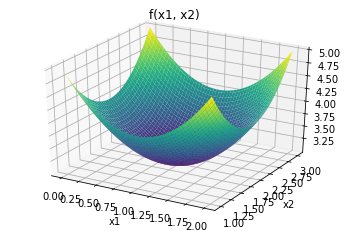

In [5]:
x = np.outer(np.linspace(0, 2, 100), np.ones(100))
y = x.copy().T + 1
z = function([x,y])

fig = plt.figure()
ax = plt.axes(projection = '3d')

ax.plot_surface(x, y, z, cmap = 'viridis', edgecolor = 'none')
ax.set(title = 'f(x1, x2)', xlabel = 'x1', ylabel = 'x2')
plt.show()

In [6]:
f_res = []
f_av_res = []
sigma_av_res = []

def evolutionary2(function, mu = 50, lambd = 400, d = 2, sigma_min = 0.0001):
    gen = 0
    sigma_av = 1

    P = parents(mu, 0, 2, 1, 3, function)        

    while(not (sigma_av < sigma_min)):
        gen += 1
        T = []
        for i in range(lambd):
            T.append(P[random.randint(0, mu - 1)])
        O = []    
        crossover_mutation(T, d, lambd, function, O, 2)        
        result = sorted(P + O, key = lambda lista: lista[2])
        P = result[0 : mu]

        f_mean = sum(row[2] for row in P) / mu
        f_res.append(P[0][2])
        f_av_res.append(f_mean)
        sigma_av = np.mean([P[0][1][0], P[0][1][1]])
        sigma_av_res.append(sigma_av)

    print('Rozwiązanie osiągnięte po', gen, 'generacjach.')
    return P[0][0]

In [7]:
[x1, x2] = evolutionary2(function)
print('x1 = %.6f' % x1)
print('x2 = %.6f' % x2)
print('f(x1, x2) = %.6f' % function([x1, x2]))

Rozwiązanie osiągnięte po 17 generacjach.
x1 = 0.999997
x2 = 1.999999
f(x1, x2) = 3.000000


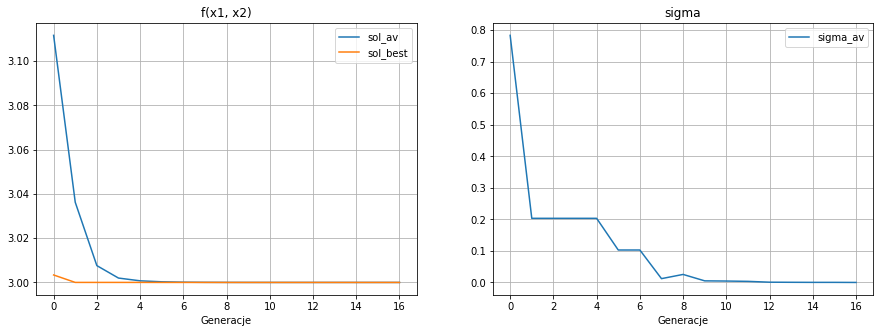

In [8]:
plt.figure(figsize = (15, 5))

plt.subplot(121)
plt.plot(f_av_res, label = 'sol_av')
plt.plot(f_res, label = 'sol_best')
plt.legend(loc = 'best')
plt.title('f(x1, x2)')
plt.xlabel('Generacje')
plt.grid(True)

plt.subplot(122)
plt.plot(sigma_av_res, label = 'sigma_av')
plt.legend(loc = 'best')
plt.title('sigma')
plt.xlabel('Generacje')
plt.grid(True)

plt.show()